In [2]:
import pandas as pd 
import json
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties

In [3]:
def streaming_data() -> pd.DataFrame:
    df = pd.read_json("../data/StreamingHistory0.json").append(pd.read_json("../data/StreamingHistory1.json"))
    df['endTime'] = pd.to_datetime(df['endTime'])
    df = df[df.endTime >= pd.to_datetime("01-01-2021")]
    return df
    
df = streaming_data()
df

,endTime,artistName,trackName,msPlayed
268,2021-01-01 03:08:00,Chris King,Evil Kunevil (feat. Trippie Redd),14762
269,2021-01-01 03:16:00,Playboi Carti,Over,426
270,2021-01-01 03:47:00,100 gecs,stupid horse (Remix) [feat. GFOTY & Count Baldor],41122
271,2021-01-01 03:49:00,100 gecs,hand crushed by a mallet (Remix) [feat. Fall O...,103886
272,2021-01-01 03:50:00,Little Big,Hypnodancer,57446
...,...,...,...,...
2164,2021-12-17 18:33:00,Taylor Swift,closure,180653
2165,2021-12-17 20:38:00,Cortex,123: 2022 Yearly Themes,6814770
2166,2021-12-17 20:39:00,Cortex,88: Cortex Airport,82503
2167,2021-12-17 20:53:00,DJ Vibe Inc. & Max Barbaria,Intro,6176


In [4]:
podcasts = ["Dimension 20", "Ologies with Alie Ward", "The Yard", "Dear Hank & John", "You Can Sit With Us", 
            "The TryPod", "Cortex", "Erin is the Funny One", "The Gus & Eddy Podcast", 'A Conversation With...', 
            "The Numberphile Podcast", "The Joe Rogan Experience", "Lex Fridman Podcast", "Good For You"]
songs = df[~df.artistName.isin(podcasts)]
top_artists = df.groupby("artistName").sum().sort_values(by='msPlayed', ascending=False).reset_index()
top_ten = top_artists[~top_artists.artistName.isin(podcasts)][:10]
top_ten["minutes_played"] = (top_ten.msPlayed/1000/60).astype('int')
top_ten.reset_index(drop=True)

,artistName,msPlayed,minutes_played
0,Taylor Swift,150763870,2512
1,Glass Animals,57189292,953
2,Sophie Cates,46803183,780
3,Phoebe Bridgers,43768698,729
4,The Avalanches,36698721,611
5,Sweet Trip,35942550,599
6,Lolo Zouaï,34286299,571
7,Hotel Fiction,33859613,564
8,Stop Light Observations,33496834,558
9,Flipturn,32440084,540


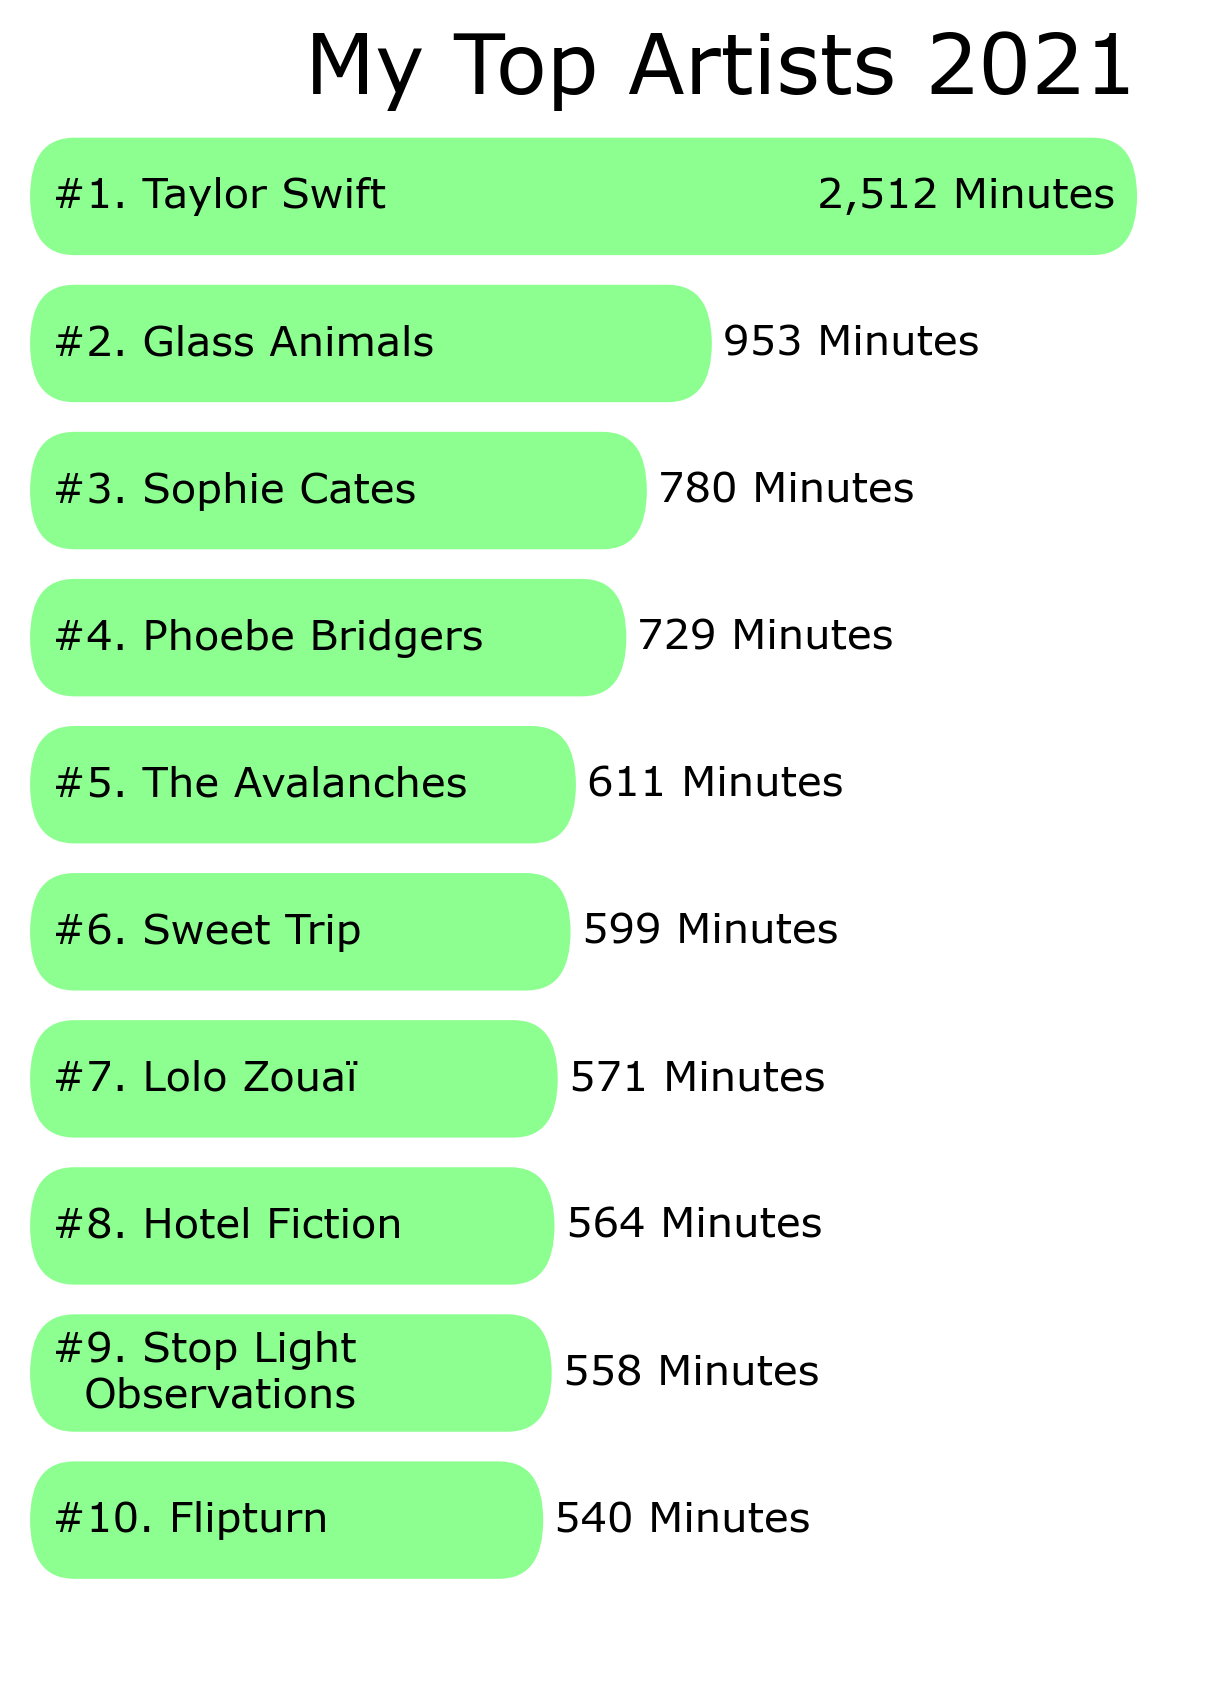

In [5]:
## Basic Barplot 
scale = 2
plt.rcParams["figure.figsize"] = [10/scale, 14/scale]
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots()
xs = np.arange(1,11)
ys = np.sqrt(top_ten.minutes_played)

font = FontProperties()
font.set_name("Verdana")

# colors = ["#f04646", #taylor swfit (red)
#           "#f277dc", #glass animals (pink)
#           "#c663ff", #sophie cates (purple)
#           "#9191ab", #phoebe bridgers (grey) 
#           "#4f4ff7", #the avalanches (blue) 
#           "#de7676", #sweet trip (light red)
#           "#ff0000", #lolo zouai (bright red) 
#           "#9a47ff", #hotel fiction (purple) 
#           "#ffb340", #stop light observations (orange)
#           "#c2ff40"] #flipturn (lime)

colors = "#8cff90"
text_color = 'black'
background_color = "white"

ax.barh(xs, ys, joinstyle='miter', color=colors)
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

labels = list(top_ten.artistName)
labels[8] = "Stop Light\nObservations" 

i = 1
for label, x, y in zip(labels, xs, top_ten.minutes_played):
    x_loc = 1
    text = f"#{i}. {label}"
    i+= 1
    if label == "Taylor Swift": 
        ax.text(x_loc, x, text, va="center", ha = 'left', fontproperties=font, color = text_color)    
        ax.text(np.sqrt(y) - 1, x, f"2,512 Minutes",va="center", ha="right", fontproperties=font, color=text_color)
    else: 
        ax.text(x_loc, x, text, va="center", ha = 'left', ma = 'right', fontproperties=font)    
        ax.text(np.sqrt(y) + 0.5, x, f"{y} Minutes",va="center", fontproperties=font, color = text_color)
        
## make bars rounded
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0040,rounding_size=2",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)
    
#change background color
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

#title 
ax.text(np.sqrt(2512), 0.3, "My Top Artists 2021", fontproperties = font, fontsize = 20, ha = "right")

plt.savefig("../plots/topartists/BaseTopArtists.png")